# Setup

In [1]:
import matplotlib.pyplot as plt
import zfit
from zfit import z  # math backend of zfit
import numpy as np
import pandas as pd
import tensorflow as tf

/home/carlos/anaconda3/envs/zfit_latest/lib/python3.8/site-packages/zfit/__init__.py:50: UserWarning: This is an ALPHA version of zfit for feature testing, do NOT use it in production! It is NOT stable and contains bugs and untested features. For production use, please use the last beta stable version of zfit.
  warnings.warn(
/home/carlos/anaconda3/envs/zfit_latest/lib/python3.8/site-packages/zfit/__init__.py:62: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [2]:
# Following https://stackoverflow.com/a/64604031
import sys

from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str("scripts")

if module_path not in sys.path:
    sys.path.append(module_path)
    
data_path = str(Path.cwd().parents[0] / "EfficiencyData" )

In [3]:
import zfitEffy
import customPDFs
import plot_tools

# Plotting data

In [27]:
binned_dataframes = [
    {
        'bin': -1,
        'dataframe': pd.read_csv(data_path + "/PHSP_Corrected_-1.csv")
    },
    {
        'bin': 0,
        'dataframe': pd.read_csv(data_path + "/PHSP_Corrected_0.csv")
    },
    {
        'bin': 1,
        'dataframe': pd.read_csv(data_path + "/PHSP_Corrected_1.csv")
    },
    {
        'bin': 2,
        'dataframe': pd.read_csv(data_path + "/PHSP_Corrected_2.csv")
    },
    {
        'bin': 4,
        'dataframe': pd.read_csv(data_path + "/PHSP_Corrected_4.csv")
    },
]

(array([66., 75., 77., 84., 66., 86., 79., 64., 71., 92., 82., 93., 76.,
        80., 81., 84., 98., 95., 77., 80.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

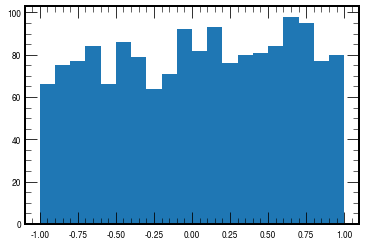

In [28]:
plt.hist(binned_dataframes[4]['dataframe'].cosThetaKMu, bins=20, range=[-1,1])

In [7]:
cos_np = np.linspace(-1, 1, 1000)

In [8]:
cos = zfit.Space('cosThetaKMu', [-1,1])

In [33]:
# Code to find an item in binned_dataframes with a certain bin

index = next((i for i, item in enumerate(binned_dataframes) if item["bin"] == -1), None)
index

0

In [29]:
# Pasando los datos a zfit.Data

zdata_bin_4 = zfit.Data.from_pandas(pd.DataFrame(binned_dataframes[4]['dataframe'].cosThetaKMu), cos, weights=binned_dataframes[4]['dataframe'].totalW)

In [34]:
zfit_w_data = [
    {
        'bin': -1,
        'data': zfit.Data.from_pandas(pd.DataFrame(binned_dataframes[0]['dataframe'].cosThetaKMu), cos, weights=binned_dataframes[0]['dataframe'].totalW)
    },
    {
        'bin': 0,
        'data': zfit.Data.from_pandas(pd.DataFrame(binned_dataframes[1]['dataframe'].cosThetaKMu), cos, weights=binned_dataframes[1]['dataframe'].totalW)
    },
    {
        'bin': 1,
        'data': zfit.Data.from_pandas(pd.DataFrame(binned_dataframes[2]['dataframe'].cosThetaKMu), cos, weights=binned_dataframes[2]['dataframe'].totalW)
    },
    {
        'bin': 2,
        'data': zfit.Data.from_pandas(pd.DataFrame(binned_dataframes[3]['dataframe'].cosThetaKMu), cos, weights=binned_dataframes[3]['dataframe'].totalW)
    },
    {
        'bin': -4,
        'data': zfit.Data.from_pandas(pd.DataFrame(binned_dataframes[4]['dataframe'].cosThetaKMu), cos, weights=binned_dataframes[4]['dataframe'].totalW)
    },
]

# Model

In [10]:
degree = 5

In [11]:
models = zfitEffy.create_bernstein_models(obs=cos, max_degree=degree, name='12')

In [40]:
models[10].params

{'c0': <zfit.Parameter '12c^0_1012' floating=True value=0.1>,
 'c1': <zfit.Parameter '12c^1_1012' floating=True value=0.1>,
 'c2': <zfit.Parameter '12c^2_1012' floating=True value=0.1>,
 'c3': <zfit.Parameter '12c^3_1012' floating=True value=0.1>,
 'c4': <zfit.Parameter '12c^4_1012' floating=True value=0.1>,
 'c5': <zfit.Parameter '12c^5_1012' floating=True value=0.1>,
 'c6': <zfit.Parameter '12c^6_1012' floating=True value=0.1>,
 'c7': <zfit.Parameter '12c^7_1012' floating=True value=0.1>,
 'c8': <zfit.Parameter '12c^8_1012' floating=True value=0.1>,
 'c9': <zfit.Parameter '12c^9_1012' floating=True value=0.1>,
 'c10': <zfit.Parameter '12c^10_1012' floating=True value=0.1>}

# Minimization

In [13]:
minimizer = zfit.minimize.Minuit()

In [100]:
# First get the minimization of all models in the same bin, then generalize to multiple bins

i=0
nll_bin_4 = []
minimums = []
results = []
while i < degree:
    nll_bin_4.append(zfit.loss.UnbinnedNLL(model=models[i], data=zfit_w_data[4]['data']))
    minimums.append(minimizer.minimize(loss=nll_bin_4[i]))
    results.append(minimums[i].hesse())
    i=i+1

In [101]:
results[4]

{<zfit.Parameter '12c^0_412' floating=True value=0.08293>: {'error': 0.015363968123966546,
  'cl': 0.68268949},
 <zfit.Parameter '12c^1_412' floating=True value=0.1464>: {'error': 0.03304166921161675,
  'cl': 0.68268949},
 <zfit.Parameter '12c^2_412' floating=True value=0.06251>: {'error': 0.05601786152876277,
  'cl': 0.68268949},
 <zfit.Parameter '12c^3_412' floating=True value=0.1871>: {'error': 0.03142753873227708,
  'cl': 0.68268949},
 <zfit.Parameter '12c^4_412' floating=True value=0.08992>: {'error': 0.0161862248839188,
  'cl': 0.68268949}}

# Minimization comparison

In [58]:
from scipy.stats import kstest

In [70]:
binned_dataframes[4]['dataframe'].cosThetaKMu.size

1606

In [81]:
# Create a sample of data with 1606 items from model

data_sample = models[3].create_sampler(n = binned_dataframes[4]['dataframe'].cosThetaKMu.size, fixed_params=True)
data_sample.to_pandas().to_numpy().flatten()

array([ 0.77300677, -0.32150743,  0.02694863, ...,  0.81956685,
       -0.18892389, -0.05485189])

In [ ]:
kstest()

In [69]:
binned_dataframes[4]['dataframe'].cosThetaKMu.to_numpy()

array([-0.07612652,  0.725278  ,  0.42920193, ...,  0.9600177 ,
       -0.4111865 ,  0.00652217])

In [102]:
kst_result = kstest(binned_dataframes[4]['dataframe'].cosThetaKMu.to_numpy(), data_sample.to_pandas().to_numpy().flatten())

In [83]:
# Create a sample of data with 1606 items from model now for the degree 6 polynomial

data_sample = models[6].create_sampler(n = binned_dataframes[4]['dataframe'].cosThetaKMu.size, fixed_params=True)
data_sample.to_pandas().to_numpy().flatten()

array([-0.93347827, -0.84850228,  0.80142974, ..., -0.70285996,
       -0.17017794,  0.9620289 ])

In [103]:
kst_result.pvalue

0.984504842375929

In [84]:
kstest(binned_dataframes[4]['dataframe'].cosThetaKMu.to_numpy(), data_sample.to_pandas().to_numpy().flatten())

KstestResult(statistic=0.0361145703611457, pvalue=0.2458190276772211)

In [97]:
# Create a sample of data with 1606 items from model now for the degree 6 polynomial

data_sample = models[11].create_sampler(n = binned_dataframes[4]['dataframe'].cosThetaKMu.size, fixed_params=True)
data_sample.to_pandas().to_numpy().flatten()

kstest(binned_dataframes[4]['dataframe'].cosThetaKMu.to_numpy(), data_sample.to_pandas().to_numpy().flatten())

KstestResult(statistic=0.0161892901618929, pvalue=0.984504842375929)

In [90]:
models[6].params

{'c0': <zfit.Parameter '12c^0_612' floating=True value=0.1>,
 'c1': <zfit.Parameter '12c^1_612' floating=True value=0.1>,
 'c2': <zfit.Parameter '12c^2_612' floating=True value=0.1>,
 'c3': <zfit.Parameter '12c^3_612' floating=True value=0.1>,
 'c4': <zfit.Parameter '12c^4_612' floating=True value=0.1>,
 'c5': <zfit.Parameter '12c^5_612' floating=True value=0.1>,
 'c6': <zfit.Parameter '12c^6_612' floating=True value=0.1>}

# Plotting

'bernstein' object has no attribute 'models'


<Figure size 432x288 with 0 Axes>

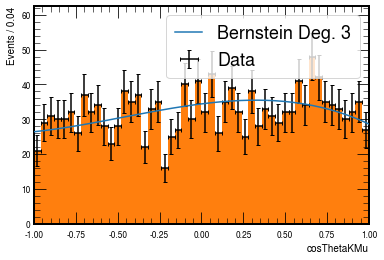

In [94]:
#for model in models:
bins = 50
fig = plt.figure()
plot_tools.plot_model(data_bin_4.cosThetaKMu.to_numpy(),
                      models[3], 
                      bins=bins, density=True, 
                      #params_text_opts = dict(x=0.7, y=0.3, ncol=2, fontsize=12), 
                     )
plt.hist(binned_dataframes[4]['dataframe'].cosThetaKMu, bins=bins, range=[-1,1])
plt.show()

'bernstein' object has no attribute 'models'


<Figure size 432x288 with 0 Axes>

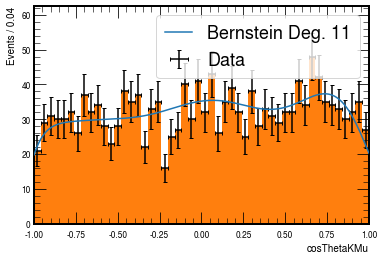

In [96]:
#for model in models:
bins = 50
fig = plt.figure()
plot_tools.plot_model(data_bin_4.cosThetaKMu.to_numpy(),
                      models[11], 
                      bins=bins, density=True, 
                      #params_text_opts = dict(x=0.7, y=0.3, ncol=2, fontsize=12), 
                     )
plt.hist(binned_dataframes[4]['dataframe'].cosThetaKMu, bins=bins, range=[-1,1])
plt.show()

# Todo List

- [ ] Set a list of coefficients
- [ ] Check function that makes bernstein model
- [ ] Try to make nll and minimization with Minuit on the model, if it fails for bin5:
    - [ ] Check function that makes fits for polynomials for bin5
- [ ] Check how to play with the parameter of degree
- [ ] Make an algorithm to calculate multiple fits
- [ ] Check how to compare the models with zfitEffy implementation of